<hr>

<table style="width:100%">
  <tr>
    <th><img align="center" src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/53/UNAL_Aplicación_Medell%C3%ADn.svg/1280px-UNAL_Aplicación_Medell%C3%ADn.svg.png" width="300"/></th>
    <th><img align="center" src="http://www.redttu.edu.co/es/wp-content/uploads/2016/01/itm.png" width="300"/> </th> 
    <th><img align="center" src="https://www.cienciasdelaadministracion.uns.edu.ar/wp-content/themes/enlighten-pro/images/logo-uns-horizontal.png" width="300"/></th>
  </tr>
</table>


<hr>

#### Pedro Atencio Ortiz - 2019 (pedroatencio@itm.edu.co)

# Módulo 2

# 1. Construccion de la red

En este notebook abordaremos los siguientes tópicos:

1. Primera red en Keras 
2. Construcción de redes
    1. Construcción como lista.
    2. Agregación de capas (model.add).
    3. Capa Input y conexión por capa.
3. Algunos aspectos técnicos
    1. Activations
    2. losses
    3. optimizers

In [1]:
# Funciones utilitarias

import numpy as np
import sklearn
from sklearn import datasets
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

def generate_data(data_type, noise=0.2):
    
    np.random.seed(0)
    if data_type == 'moons':
        X, Y = datasets.make_moons(200, noise=noise)
    elif data_type == 'circles':
        X, Y = sklearn.datasets.make_circles(200, noise=noise)
    elif data_type == 'blobs':
        X, Y = sklearn.datasets.make_blobs(centers=2, cluster_std=noise)
    return X, Y

def visualize_model(model, X, Y):
    XT = np.copy(X)
    # Set min and max values and give it some padding
    x_min, x_max = XT[:, 0].min() - .5, XT[:, 0].max() + .5
    y_min, y_max = XT[:, 1].min() - .5, XT[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.figure(figsize=(7,5))
    plt.contourf(xx, yy, Z, cmap=plt.cm.bone)

    color = ['blue' if y == 1 else 'red' for y in np.squeeze(Y)]
    plt.scatter(X[:,0], X[:,1], color=color)

    plt.show()

<hr>

## 1.1. Primera red en Keras

Para este ejercicio, utilizaremos Keras para construir la misma red neuronal del módulo anterior e igualmente entrenaremos la misma mediante los optimizadores de la librería.

<img align="center" src="https://github.com/psatencio/intro_keras/blob/master/figures/layered_net.png?raw=true" width="500"/>

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop

In [3]:
# Dataset
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([[0], [1], [1], [0]])

nx = X.shape[0]
m = len(X)

In [31]:
# Red neuronal
model = Sequential()
model.add(Dense(units=3, input_dim=2, activation='sigmoid')) #capa 1. La dimensionalidad de la entrada solo se define para la primera capa
model.add(Dense(units=1, activation='sigmoid')) #capa 2

optimizador = RMSprop(lr=0.7) #optimizador

model.compile(optimizer=optimizador,
              loss='binary_crossentropy', # funcion loss
              metrics=['accuracy']) # metricas complementarias

Error (Loss) final: 2.0920E-04
Precision (Accuracy) final: 1.00


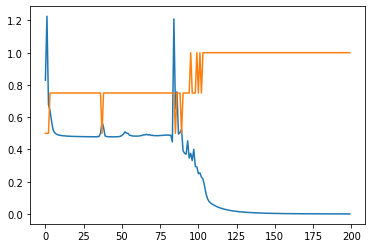

In [32]:
history = model.fit(X,Y, epochs=200, verbose=0)

print("Error (Loss) final: %.4E"%(np.array(history.history['loss'][-1:]))) #Error final de la lista de errores
print("Precision (Accuracy) final: %.2f"%(np.array(history.history['acc'][-1:])))

plt.plot(history.history['loss'])
plt.plot(history.history['acc'])
plt.show()

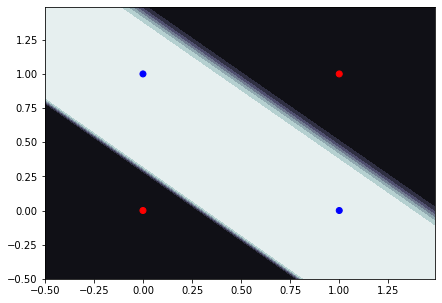

In [33]:
visualize_model(model, X, Y)

<hr>

### Trabajemos

<br>

<font size=4>

1. Utilicemos lo implementado al momento para clasificar los problemas __'moons'__ y __'circles'__ (ver figura siguiente), y probar:

<br>

<ul>

<li>Pruebe agregando más neuronas en la capa 1.</li>
<li>Pruebe agregando más capas a la red.</li>
<li>Pruebe distintas configuraciones $\alpha$ (learning rate).</li>
<li>Pruebe distintos valores para el número de épocas.</li>
</ul>

</font>

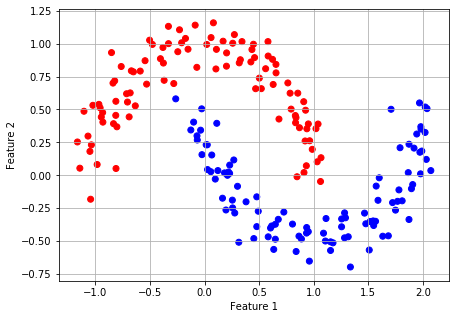

In [87]:
X, Y = generate_data('moons', 0.1)

color = ['blue' if y == 1 else 'red' for y in np.squeeze(Y)] # una lista para darle color a las clases

plt.figure(figsize=(7,5))
plt.scatter(X[:,0], X[:,1], color=color)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid()

plt.show()

<hr>

## 1.2. Formas de construcción.

Dependiendo del nivel de especificidad deseado para la arquitectura de la red neuronal, podemos utilizar diferentes formas de construirla (ver figura).

<img align="center" src="https://github.com/psatencio/intro_keras/blob/master/figures/build_strategies.png?raw=true" width="500"/>

A continuación, analicemos tres formas de construir una misma red neuronal.

In [4]:
# Como lista
modelA = Sequential([Dense(units=2, input_dim=2, activation='sigmoid'),
                   Dense(units=1, activation='sigmoid')])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [7]:
# Utilizando el modulo add (agregar)
modelB = Sequential()
modelB.add(Dense(units=2, input_dim=2, activation='sigmoid'))
modelB.add(Dense(units=1, activation='sigmoid'))

In [5]:
# Cableando manualmente las capas

from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

x = Input(shape=(2,))
a1 = Dense(units=2, activation='sigmoid')(x)
a2 = Dense(units=1, activation='sigmoid')(a1)

modelC = Model(inputs=x, outputs=a2)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [6]:
optimizador = RMSprop(lr=0.5) #optimizador

modelC.compile(optimizer=optimizador,
              loss='binary_crossentropy', # funcion loss
              metrics=['accuracy']) # metricas complementarias

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Error (Loss) final: 1.3605E-05
Precision (Accuracy) final: 1.00


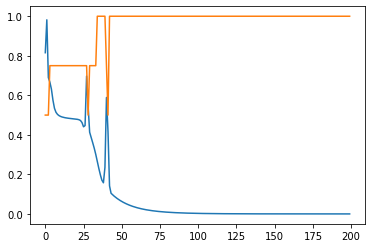

In [7]:
history = modelC.fit(X,Y, epochs=200, verbose=0)

print("Error (Loss) final: %.4E"%(np.array(history.history['loss'][-1:]))) #Error final de la lista de errores
print("Precision (Accuracy) final: %.2f"%(np.array(history.history['acc'][-1:])))

plt.plot(history.history['loss'])
plt.plot(history.history['acc'])
plt.show()

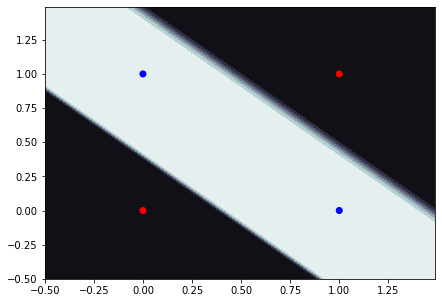

In [9]:
visualize_model(modelC, X, Y)